## **Automatidata project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

# Course 5 End-of-course project: Build a multiple linear regression model

In this activity, you will build a multiple linear regression model
<br/>

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

<br/>
Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



The data consulting firm Automatidata has recently hired you as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model for ride durations based on a variety of variables. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi/ride share trip durations. You’ve impressed your Automatidata colleagues with your hard work and attention to detail. The data team believes that you are ready to build the regression model and update the client New York City TLC about your progress.

[PACE strategy document](https://docs.google.com/document/d/1IejqJvJZQ5SgL6t7VKgvTuIEL9V93w4Wy1HriG8lQ2A/template/preview?resourcekey=0-sMQ1UzEI52Z9ydH1MS3_8Q)

# Build a multiple linear regression model

As you've learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed. Please note that this activity is optional, and will not affect your completion of the course.

Completing this activity will help you practice planning out and buidling a multiple linear regression model based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.

## **PACE stages**


<img src="images/Pace.png" width="100" height="100" align=left>

   *        [Plan](#scrollTo=psz51YkZVwtN&line=3&uniqifier=1)
   *        [Analyze](#scrollTo=mA7Mz_SnI8km&line=4&uniqifier=1)
   *        [Construct](#scrollTo=Lca9c8XON8lc&line=2&uniqifier=1)
   *        [Execute](#scrollTo=401PgchTPr4E&line=2&uniqifier=1)

<img src="images/Plan.png" width="100" height="100" align=left>


# Pace: **Plan Stage**


## Step 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [49]:
# Imports
### YOUR CODE HERE ###
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

Load the NYC TLC dataset provided.

In [2]:
# Data loading
### YOUR CODE HERE ###

df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

<img src="images/Analyze.png" width="100" height="100" align=left>

# PACE: **Analyze Stage**

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a multiple linear regression model?


## Step 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

Start with `.shape` and `.info()`.

In [3]:
# Start with `.shape` and `.info()`
### YOUR CODE HERE ###
print(df.shape)
print('')
print(df.info())

(22699, 18)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  fl

Use `.head()`.

In [6]:
# Use `.head()`
### YOUR CODE HERE ###

df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


Create `trip_duration`.

In [9]:
# Create `trip_duration`
### YOUR CODE HERE ###
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['trip_duration'] = (df.tpep_dropoff_datetime - df.tpep_pickup_datetime).apply(lambda x: x.seconds/60)
df['trip_duration']

0        14.066667
1        26.500000
2         7.200000
3        30.250000
4        16.716667
           ...    
22694     3.266667
22695    40.800000
22696     4.133333
22697    11.933333
22698    13.333333
Name: trip_duration, Length: 22699, dtype: float64

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [10]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
### YOUR CODE HERE ###
df.isna().any()


Unnamed: 0               False
VendorID                 False
tpep_pickup_datetime     False
tpep_dropoff_datetime    False
passenger_count          False
trip_distance            False
RatecodeID               False
store_and_fwd_flag       False
PULocationID             False
DOLocationID             False
payment_type             False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
trip_duration            False
dtype: bool

In [11]:
df.drop_duplicates(inplace=True)

Use `.describe()`.

In [12]:
# Use .describe()
### YOUR CODE HERE ###
df.describe(include = 'all')

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
unique,NaN,NaN,22687,22688,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2017-07-03 15:45:19,2017-10-18 20:07:45,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2,2,NaN,NaN,NaN,22600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,2017-01-01 00:08:25,2017-01-01 00:17:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2017-12-31 23:45:30,2017-12-31 23:49:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.675849e+07,1.556236,NaN,NaN,1.642319,2.913313,1.043394,NaN,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,17.077216
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,NaN,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,62.694515
min,1.212700e+04,1.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,0.000000
25%,2.852056e+07,1.000000,NaN,NaN,1.000000,0.990000,1.000000,NaN,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,6.650000


Create a scatterplot to visualize the relationship between variables of interest.

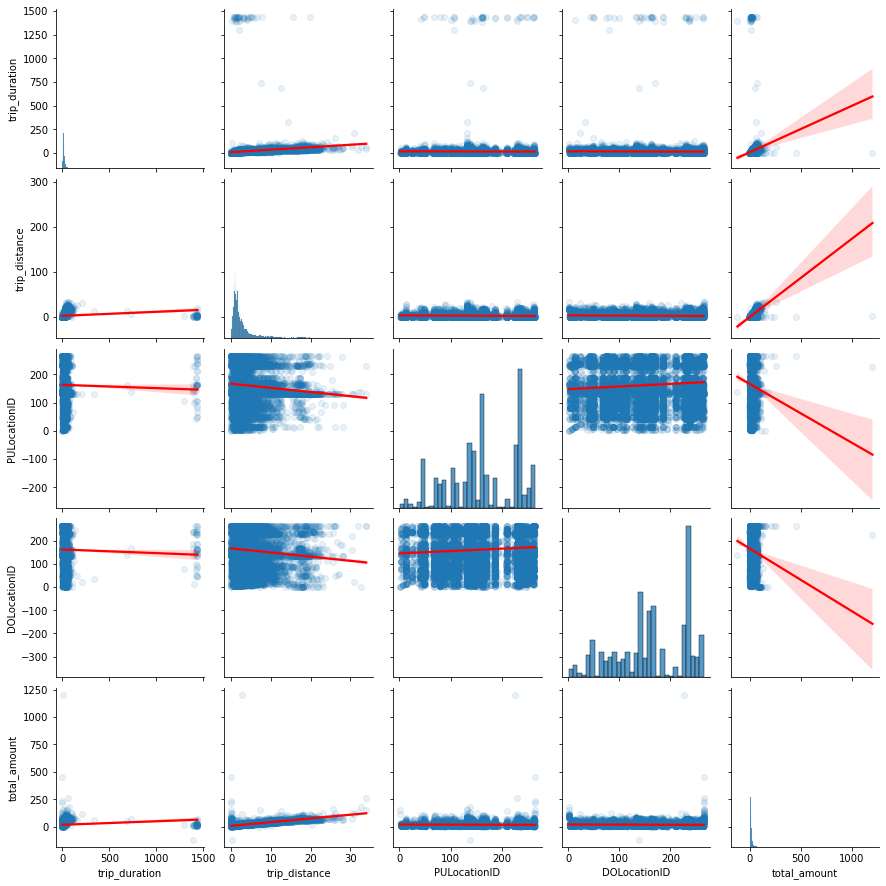

In [18]:
# Create a scatterplot to visualize the relationship between variables of interest
### YOUR CODE HERE ###;
sns.pairplot(df[['trip_duration','trip_distance','PULocationID','DOLocationID','total_amount']],kind='reg' , plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})


Create a pairplot to visualize pairwise relationships between relevant variables.

In [ ]:
# Create a pairplot to visualize pairwise relationships between variables in the data
### YOUR CODE HERE ###



## Step 2b. Address any outliers

Use a boxplot to visualize any outliers.

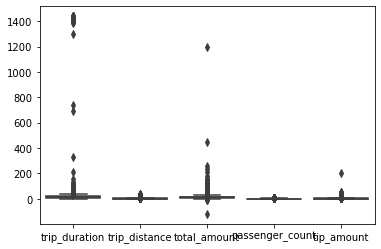

In [41]:
# Create boxplot to visualize the outliers
### YOUR CODE HERE ###
relevant_var = ['trip_duration','trip_distance','total_amount','passenger_count','tip_amount']
sns.boxplot(data=df[relevant_var])
plt.show()

Use a boxplot to visualize the distribution of the data without outliers.

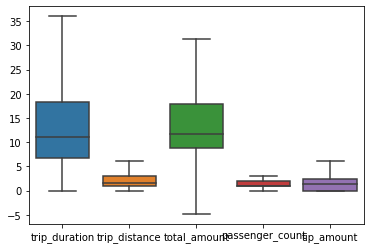

In [42]:
# Create boxplot to visualize distribution of data without outliers
### YOUR CODE HERE ###

sns.boxplot(data=df[relevant_var], showfliers=False)
plt.show()

Remove outliers as needed.

In [43]:
# Remove outliers as needed
### YOUR CODE HERE ###

no_df = df[(np.abs(stats.zscore(df['trip_duration'])) < 3) & (np.abs(stats.zscore(df['total_amount'])) < 3) & (np.abs(stats.zscore(df['tip_amount'])) < 3) & ((np.abs(stats.zscore(df['passenger_count'])) < 3) & (np.abs(stats.zscore(df['trip_distance'])) < 3))]
no_df

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16,59.633333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22693,67858616,2,2017-08-10 22:20:04,2017-08-10 22:29:31,1,0.89,1,N,229,170,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,9.450000
22694,14873857,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.0,0.3,5.80,3.266667
22696,74239933,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.0,0.3,5.30,4.133333
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.0,0.3,13.00,11.933333


## Step 2c. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [ ]:
# Correlation matrix to help determine most correlated variables
### YOUR CODE HERE ###



Visualize a correlation heatmap of the data.

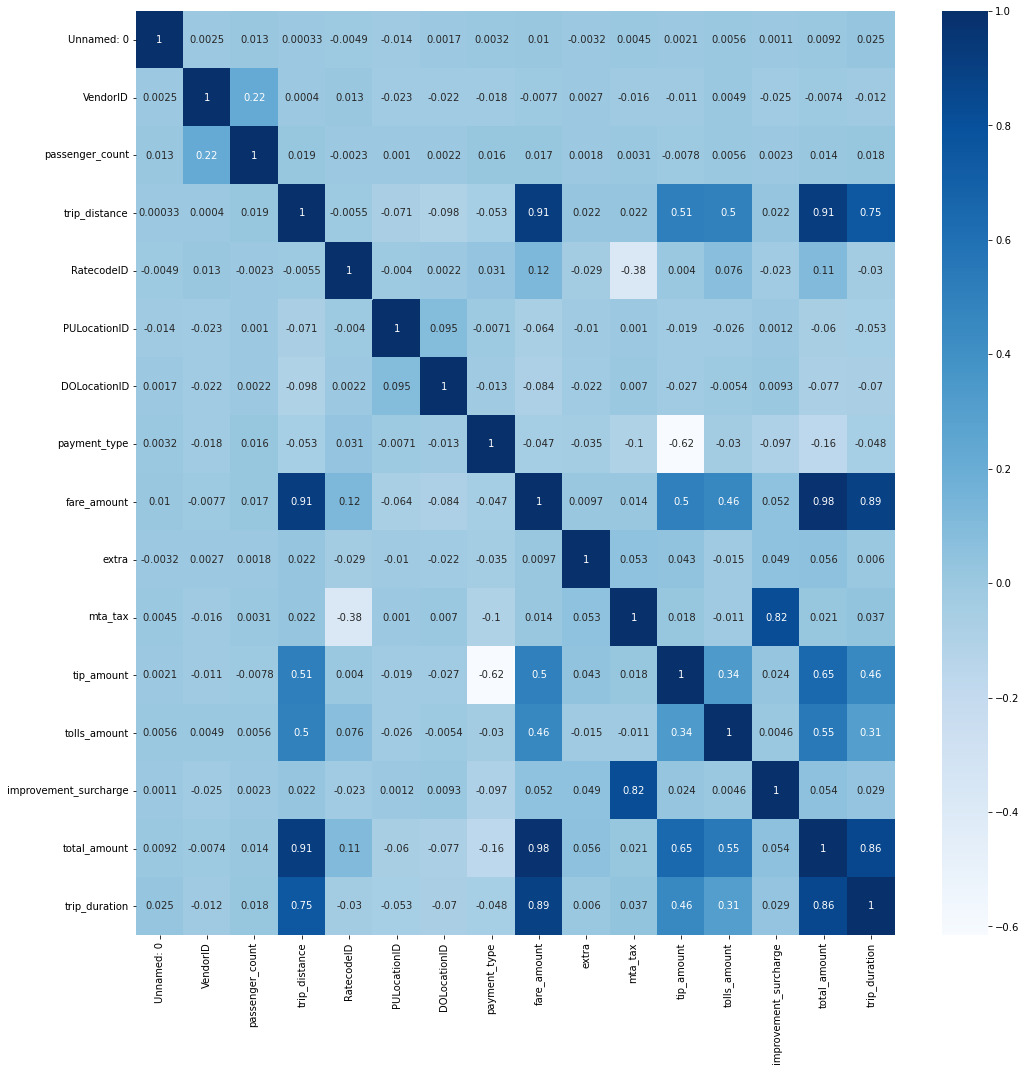

In [48]:
# Create correlation heatmap
### YOUR CODE HERE ###

plt.figure(figsize=(17,17))
sns.heatmap(data=no_df.corr(), annot=True, cmap='Blues')

<img src="images/Construct.png" width="100" height="100" align=left>

# PACE: **Construct Stage**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in the [PACE Strategy Doc](https://docs.google.com/document/d/1HzWWcQzBqsySFdpftbXjHDDkEUxa8Q9Rh7goVnSrAfc/edit?usp=sharing) to reflect on the Constructing stage of this task.
* Why did you select the X variables you did?

## Step 3a. Select outcome variable and features

Set your Y and X variables. Y represents the outcome variable, and X represents the features.

In [61]:
# Set your Y and X variables
### YOUR CODE HERE ###
y = no_df['trip_duration']

x = no_df[['total_amount','trip_distance']]


## Step 3b. Pre-process data

To help with processing time, consider dropping irrelevant and redundant columns.

In [62]:
# Pre-process data
### YOUR CODE HERE ###
x

,total_amount,trip_distance
1,20.80,1.80
2,8.75,1.00
3,27.69,3.70
4,17.80,4.37
6,59.16,12.83
...,...,...
22693,10.56,0.89
22694,5.80,0.61
22696,5.30,0.42
22697,13.00,2.36


Use `StandardScaler()` and `fit_transform()` to standardize the X variables.

In [63]:
# Standardize the X variables
### YOUR CODE HERE ###
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


## Step 3c. Build model

Create training and testing sets.

In [72]:
# Create training and testing sets
#### YOUR CODE HERE ####
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,  test_size=0.2, random_state=123)

Build and fit your model to the data.

In [73]:
# Build and fit your model to the data
### YOUR CODE HERE ###

lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Step 3d. Evaluate model

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [74]:
# Evaluate the model performance on the training data
### YOUR CODE HERE ###

r_sq = lr.score(x_train, y_train)
print("Coefficient of determination:", r_sq)
y_pred = lr.predict(x_train)
print("R^2:", r2_score(y_train, y_pred))
print("MAE:", mean_absolute_error(y_train, y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_train, y_pred)))

Coefficient of determination: 0.7448329571687069
R^2: 0.7448329571687069
MAE: 2.9376032026373085
RMSE: 4.78066092960228


In [75]:
# Evaluate the model performance on the testing data
### YOUR CODE HERE ###

r_sq_test = lr.score(x_test, y_test)
print("Coefficient of determination:", r_sq_test)
y_pred_test = lr.predict(x_test)
print("R^2:", r2_score(y_test, y_pred_test))
print("MAE:", mean_absolute_error(y_test,y_pred_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.7461027767827391
R^2: 0.7461027767827391
MAE: 2.866052184423747
RMSE: 4.616493417311096


<img src="images/Execute.png" width="100" height="100" align=left>

# PACE: **Execute Stage**

Consider these questions [PACE Strategy Doc](https://docs.google.com/document/d/1HzWWcQzBqsySFdpftbXjHDDkEUxa8Q9Rh7goVnSrAfc/edit?usp=sharing) to reflect on the Execute stage of this task.

## Step 4a. Results

If the linear regression assumptions are met, the model results can be appropriately interpreted.

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [71]:
# Create a `results` dataframe
### YOUR CODE HERE ###

results = pd.DataFrame(data={"actual": y_test,
                             "predicted": y_pred_test.ravel()})
results["residual"] = results["actual"] - results["predicted"]
results.head()

,actual,predicted,residual
12578,2.616667,4.372866,-1.756199
16144,18.983333,22.731166,-3.747833
22565,28.350000,24.655385,3.694615
12682,19.933333,16.224827,3.708506
15042,7.133333,7.382867,-0.249533


## Step 4b. Visualize model results

Create a scatterplot to visualize `predicted` over `actual`.

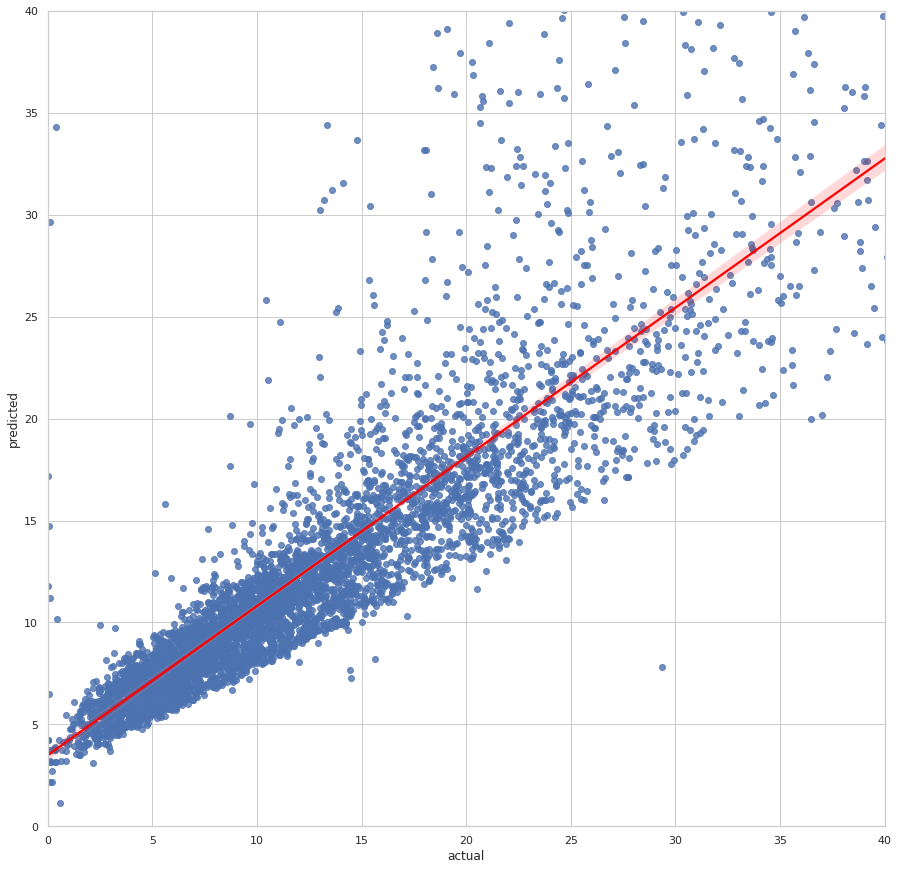

In [76]:
# Create a scatterplot to visualize `predicted` over `actual`
### YOUR CODE HERE ###

sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
sns.regplot(x="actual",
           y="predicted",
           data=results, line_kws={"color": "red"})
plt.ylim(0, 40)
plt.xlim(0,40)
plt.show()

Visualize the distribution of the `residuals`.

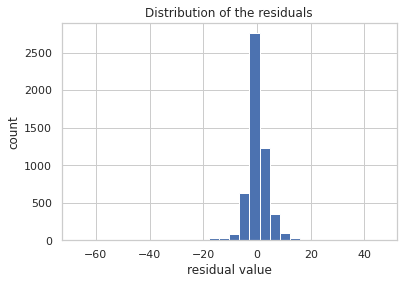

In [77]:
# Visualize the distribution of the `residuals`
### YOUR CODE HERE ###

plt.hist(results["residual"], bins=30)
plt.title("Distribution of the residuals")
plt.xlabel("residual value")
plt.ylabel("count")
plt.show()

Create a scatterplot of `residuals` over `predicted`.

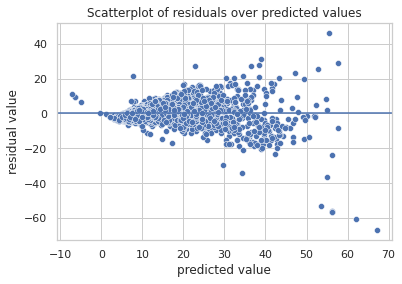

In [78]:
# Create a scatterplot of `residuals` over `predicted`
### YOUR CODE HERE ###

sns.scatterplot(x="predicted", y="residual", data=results)
plt.axhline(0)
plt.title("Scatterplot of residuals over predicted values")
plt.xlabel("predicted value")
plt.ylabel("residual value")
plt.show()

## Step 4c. Conclusion

**What are the key takeaways from this notebook?**



**What results can be presented from this notebook?**

